In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

In [3]:
df  = pd.read_csv('predict_table.csv')
pd.set_option('display.max_columns', None)

In [4]:
df

,rank_label,predictive_score,relevancy_score,keyword_id,keyword,course_id,category,subcategory,cat_match,subcat_match,topic_match,duration,p_level,p_badge,reviews,students,rating,last_updated,published,is_free,enroll30,sales30,promo30,reviews30,engagement30,is_ufb,is_promo,promo_perc
0,50,5.143967,1338.0725,39,javascript objects,14282,Development,Web Development,1,1,0,15.0,1,0,6271,30729,4.75,32.0,1554.0,0,266,266,0,63,19.7,True,0,0
1,25,5.281972,1386.1775,39,javascript objects,15224,IT & Software,Other IT & Software,0,0,0,2.0,0,0,84,7531,3.71,1798.0,1798.0,0,0,0,0,1,0.0,False,0,0
2,22,5.294001,1342.8854,39,javascript objects,25434,Design,Web Design,0,0,1,1.5,1,0,153,17229,4.46,1800.0,1797.0,0,0,0,0,0,0.0,False,0,0
3,49,5.149408,1380.6942,39,javascript objects,33064,Development,Web Development,1,1,0,4.5,0,0,609,3925,4.27,99.0,1724.0,0,25,25,0,1,24.1,False,0,0
4,6,5.345454,1403.0973,39,javascript objects,33240,Development,Programming Languages,1,0,0,1.5,0,0,489,3920,4.38,1829.0,2386.0,0,16,16,0,4,0.0,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048511,4,5.442092,1501.7714,16421,price action trading,869864,Finance & Accounting,Investing & Trading,1,1,0,4.5,1,0,190,718,4.34,72.0,220.0,0,24,24,0,12,58.6,False,0,0
1048512,27,5.270616,1348.1145,16421,price action trading,873155,Business,Other Business,0,0,0,2.5,0,0,37,103,3.84,178.0,199.0,0,0,0,0,0,20.7,False,0,0
1048513,18,5.319838,1491.7838,16421,price action trading,876428,Finance & Accounting,Investing & Trading,1,1,0,1.0,1,0,7,21,4.07,185.0,185.0,0,0,0,0,0,0.0,False,0,0
1048514,47,0.227058,1359.1895,16421,price action trading,877170,Finance & Accounting,Investing & Trading,1,1,0,1.0,0,0,89,1802,4.33,184.0,184.0,1,0,0,0,0,11.0,NaN,0,0


In [5]:
df.isnull().sum()

rank_label              0
predictive_score        0
relevancy_score         0
keyword_id              0
keyword                 0
course_id               0
category                0
subcategory             0
cat_match               0
subcat_match            0
topic_match             0
duration                0
p_level                 0
p_badge                 0
reviews                 0
students                0
rating                  0
last_updated          633
published            8797
is_free                 0
enroll30                0
sales30                 0
promo30                 0
reviews30               0
engagement30        52904
is_ufb              54579
is_promo                0
promo_perc              0
dtype: int64

In [6]:
df.describe(include='all')

,rank_label,predictive_score,relevancy_score,keyword_id,keyword,course_id,category,subcategory,cat_match,subcat_match,topic_match,duration,p_level,p_badge,reviews,students,rating,last_updated,published,is_free,enroll30,sales30,promo30,reviews30,engagement30,is_ufb,is_promo,promo_perc
count,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1048516,1.048516e+06,1048516,1048516,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.047883e+06,1.039719e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,1.048516e+06,995612.000000,993937,1.048516e+06,1.048516e+06
unique,NaN,NaN,NaN,NaN,17741,NaN,14,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,aromatherapy,NaN,Development,Web Development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,61,NaN,254921,87837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810610,NaN,NaN
mean,3.047229e+01,5.159180e+00,1.181821e+03,1.502199e+05,NaN,4.020676e+05,NaN,NaN,6.931625e-01,5.010586e-01,1.586118e-01,7.130554e+00,5.008145e-01,2.516042e-01,1.316861e+03,1.106529e+04,4.179096e+00,5.902486e+02,1.046207e+03,1.742749e-02,2.427726e+02,1.720538e+02,7.597880e+01,3.144831e+01,8.463285,NaN,1.301745e-02,1.023926e+00
std,1.732345e+01,6.573873e-01,1.826572e+02,1.498310e+05,NaN,4.054119e+05,NaN,NaN,4.611816e-01,4.999991e-01,3.653139e-01,1.085261e+01,7.386271e-01,6.985206e-01,7.627880e+03,3.709216e+04,8.098467e-01,6.350139e+02,7.156426e+02,1.308579e-01,1.540185e+03,9.612678e+02,9.304430e+02,1.878692e+02,24.698448,NaN,1.133490e-01,9.319709e+00
min,1.000000e+00,0.000000e+00,4.771600e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,-4.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000,NaN,0.000000e+00,0.000000e+00
25%,1.500000e+01,5.150481e+00,1.049213e+03,2.614200e+04,NaN,2.346500e+04,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+00,0.000000e+00,0.000000e+00,1.700000e+01,2.410000e+02,4.060000e+00,8.800000e+01,4.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000e+00,0.000000e+00
50%,3.000000e+01,5.242862e+00,1.069389e+03,1.026800e+05,NaN,4.855600e+04,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,3.500000e+00,0.000000e+00,0.000000e+00,7.900000e+01,1.670000e+03,4.370000e+00,3.380000e+02,9.500000e+02,0.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000,NaN,0.000000e+00,0.000000e+00
75%,4.500000e+01,5.309286e+00,1.357311e+03,2.227170e+05,NaN,8.262140e+05,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,4.310000e+02,7.189000e+03,4.570000e+00,9.280000e+02,1.553000e+03,0.000000e+00,3.500000e+01,3.400000e+01,0.000000e+00,8.000000e+00,15.500000,NaN,0.000000e+00,0.000000e+00


In [7]:
#df = df.drop(['is_promo','promo_perc'], axis=1)

In [8]:
import matplotlib.pyplot as plt 

In [9]:
df.dtypes

rank_label            int64
predictive_score    float64
relevancy_score     float64
keyword_id            int64
keyword              object
course_id             int64
category             object
subcategory          object
cat_match             int64
subcat_match          int64
topic_match           int64
duration            float64
p_level               int64
p_badge               int64
reviews               int64
students              int64
rating              float64
last_updated        float64
published           float64
is_free               int64
enroll30              int64
sales30               int64
promo30               int64
reviews30             int64
engagement30        float64
is_ufb               object
is_promo              int64
promo_perc            int64
dtype: object

In [10]:
X = df.drop(['keyword','subcategory','keyword_id','category', 'course_id', 'relevancy_score', 'reviews30', 'reviews','predictive_score'], axis=1).dropna()
y = X.pop('rank_label',)

In [11]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[49 24 21 ... 26 17 23]
multiclass
multiclass
multiclass


In [12]:
X = X.fillna(X.mean())

In [13]:
X.isnull().sum()

cat_match       0
subcat_match    0
topic_match     0
duration        0
p_level         0
p_badge         0
students        0
rating          0
last_updated    0
published       0
is_free         0
enroll30        0
sales30         0
promo30         0
engagement30    0
is_ufb          0
is_promo        0
promo_perc      0
dtype: int64

In [14]:
y = y.fillna(y.mean())

In [16]:
y.isnull().sum()

0

In [17]:
# X = X.astype(np.float32)


In [18]:
y = y.astype(np.int)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size= 0.7, test_size = 0.3)

In [20]:
columns = xtrain.columns

In [21]:
xtrain.dtypes

cat_match         int64
subcat_match      int64
topic_match       int64
duration        float64
p_level           int64
p_badge           int64
students          int64
rating          float64
last_updated    float64
published       float64
is_free           int64
enroll30          int64
sales30           int64
promo30           int64
engagement30    float64
is_ufb             bool
is_promo          int64
promo_perc        int64
dtype: object

In [22]:
# from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# # Create decision tree classifer object
# clf = RandomForestClassifier(random_state=0, n_jobs=-1)
# # Train model
# model = clf.fit(xtrain, ytrain)

# # Calculate feature importances
# importances = model.feature_importances_
# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]

# # Rearrange feature names so they match the sorted feature importances
# names = [columns[i] for i in indices]

# plt.figure(figsize=(16,8))
# # Barplot: Add bars
# plt.bar(range(xtrain.shape[1]), importances[indices])
# # Add feature names as x-axis labels
# plt.xticks(range(xtrain.shape[1]), names, rotation=25, fontsize = 10)
# # Create plot title
# plt.title("Feature Importance")
# # Show plot
# plt.show()

In [23]:
# plt.figure()
# plt.title("Feature importances (Logistic Regression)")
# plt.bar(range(10), coefs[indices[:10]],
#        color="r", align="center")
# plt.xticks(range(10), xtrain.iloc[indices[:10]], rotation=45, ha='right')
# plt.subplots_adjust(bottom=0.3)

In [24]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [25]:
reg = ensemble.GradientBoostingRegressor(n_estimators=5)

reg.fit(xtrain, ytrain)
mse = mean_squared_error(ytest, reg.predict(xtest))

In [26]:
mse

292.5128443419794

Text(0.5, 1.0, 'Feature Importance (MDI)')

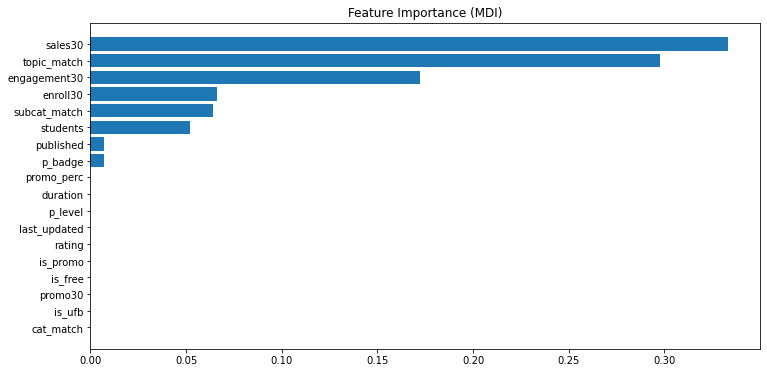

In [27]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3
fig = plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(xtrain.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')



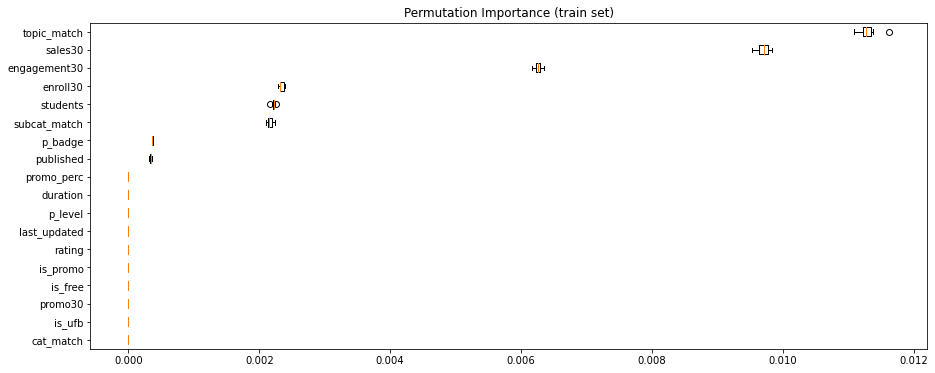

In [30]:
result = permutation_importance(reg, xtrain, ytrain, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(15,6))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(xtrain.columns)[sorted_idx])
plt.title("Permutation Importance (train set)")
fig.tight_layout()
plt.show()

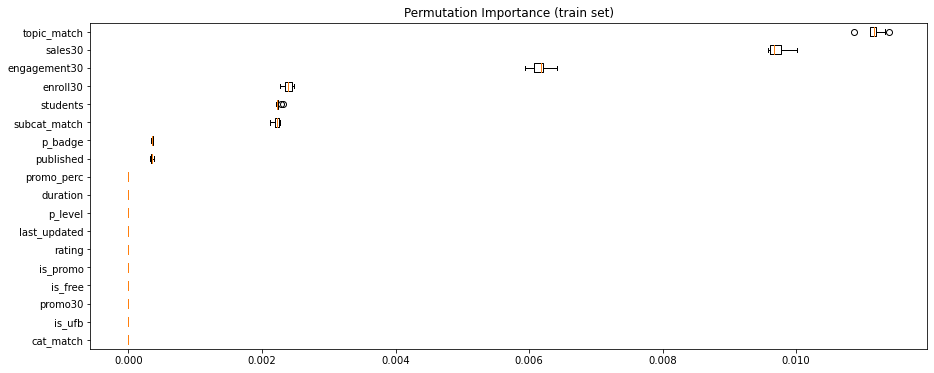

In [31]:
result = permutation_importance(reg, xtest, ytest, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(15,6))
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(xtrain.columns)[sorted_idx])
plt.title("Permutation Importance (train set)")
fig.tight_layout()
plt.show()

In [87]:
xtest

,keyword_id,cat_match,subcat_match,topic_match,duration,p_level,p_badge,students,rating,last_updated,published,is_free,enroll30,sales30,promo30,engagement30,is_ufb,is_promo,promo_perc
659591,10405.0,1.0,0.0,0.0,2.0,2.0,0.0,17760.0,4.39,949.0,1298.0,0.0,313.0,313.0,0.0,18.000000,1.0,0.0,0.0
852679,26451.0,0.0,0.0,0.0,4.5,1.0,0.0,1664.0,4.49,104.0,493.0,0.0,106.0,106.0,0.0,20.700001,1.0,0.0,0.0
953760,205618.0,0.0,0.0,0.0,2.0,0.0,0.0,2515.0,4.27,1754.0,1754.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
338935,43.0,1.0,1.0,1.0,1.5,1.0,0.0,6923.0,3.97,374.0,1661.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
117636,194711.0,1.0,0.0,0.0,5.0,0.0,0.0,70508.0,4.19,195.0,191.0,0.0,2981.0,182.0,2799.0,1.400000,0.0,1.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865278,37656.0,1.0,0.0,0.0,6.5,1.0,1.0,29834.0,4.57,176.0,773.0,0.0,1148.0,1148.0,0.0,32.200001,1.0,0.0,0.0
749862,141588.0,1.0,1.0,0.0,3.0,0.0,0.0,2423.0,4.47,370.0,368.0,0.0,106.0,106.0,0.0,13.800000,0.0,0.0,0.0
903814,98323.0,1.0,1.0,1.0,0.6,0.0,0.0,1278.0,4.41,1825.0,1825.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
741955,127429.0,1.0,1.0,0.0,1.5,2.0,0.0,27.0,3.55,137.0,129.0,0.0,4.0,4.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
import seaborn as sns
plt.figure(figsize=(14,7))

# Add title
plt.title("Udemy score predict")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=xtest, annot=True)

# Add label for horizontal axis
plt.xlabel("UDemy ")

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.datasets import make_regression
xtrain, ytrain = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=2, random_state=0)

In [28]:
importances = regr.feature_importances_
indices = np.argsort(importances)[::-1]

In [29]:
names = [columns[i] for i in indices]

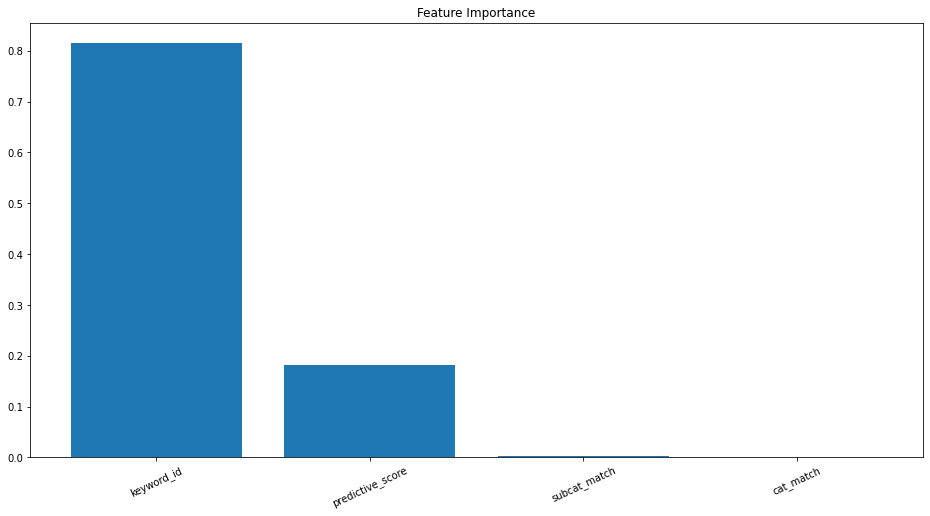

In [30]:
plt.figure(figsize=(16,8))
# Barplot: Add bars
plt.bar(range(xtrain.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(xtrain.shape[1]), names, rotation=25, fontsize = 10)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

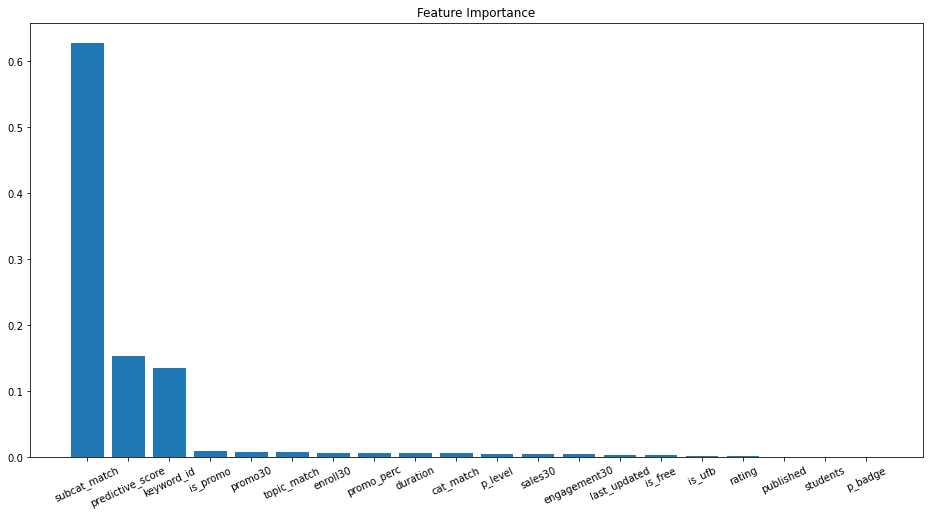

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
xtrain, ytrain = make_regression(n_features=20, n_informative=4,
                        random_state=0, shuffle=False)
regra = AdaBoostRegressor(random_state=0, n_estimators=100)
model = regra.fit(xtrain, ytrain)
AdaBoostRegressor(n_estimators=100, random_state=0)
regra.predict(xtest)
regra.score(xtest, ytest)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [columns[i] for i in indices]

plt.figure(figsize=(16,8))
# Barplot: Add bars
plt.bar(range(xtrain.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(xtrain.shape[1]), names, rotation=25, fontsize = 10)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()